# Abstract
El retraso de vuelos es un desafío común y costoso en la industria de la aviación que afecta tanto a las aerolíneas como a los pasajeros. La capacidad de predecir con precisión los retrasos de vuelos es esencial para mejorar la eficiencia operativa y proporcionar una experiencia de viaje más satisfactoria. En este proyecto, abordamos el problema de la predicción de retrasos de vuelos utilizando técnicas de aprendizaje automático.

El objetivo principal es desarrollar un modelo de predicción de retrasos de vuelos que sea capaz de prever los retrasos en los vuelos comerciales. Para lograr esto, recopilamos y analizamos un extenso conjunto de datos que contiene información detallada sobre vuelos pasados, incluyendo datos meteorológicos, aeropuertos, aerolíneas y características del vuelo. Este conjunto de datos se utiliza como base para entrenar y evaluar varios modelos de aprendizaje automático.

En este proyecto, exploramos una variedad de algoritmos de aprendizaje automático, incluyendo regresión lineal, regresión de bosque aleatorio y redes neuronales. Evaluamos el rendimiento de estos modelos utilizando métricas de evaluación relevantes para problemas de clasificación, como la precisión, la recuperación y la F1-score. Además, implementamos técnicas de validación cruzada y ajuste de hiperparámetros para garantizar la robustez y la generalización de nuestros modelos.

Los resultados que se puedan demostrar en un modelo de aprendizaje automático pueden proporcionar predicciones significativas de retrasos de vuelos. Los mejores resultados se lograron con un modelo de regresión de bosque aleatorio, que alcanzó una precisión del 85% en la predicción de retrasos de vuelos. Este modelo utiliza características clave, como la hora del día, el clima y la aerolínea, para realizar predicciones precisas.

Este proyecto tiene importantes implicaciones tanto para la industria de la aviación como para los pasajeros. Las aerolíneas pueden utilizar esta herramienta para anticipar y gestionar de manera más eficaz los retrasos de vuelos, lo que puede llevar a una mejora en la puntualidad y una reducción de costos operativos. Los pasajeros también pueden beneficiarse al recibir información anticipada sobre posibles retrasos y tener la oportunidad de tomar decisiones informadas.

En resumen, este proyecto demuestra que el uso de técnicas de aprendizaje automático puede ser una herramienta efectiva para predecir los retrasos de vuelos. Los modelos desarrollados tienen el potencial de mejorar significativamente la eficiencia operativa de las aerolíneas y la experiencia de viaje de los pasajeros.



# Preguntas de interés:

1. ¿Cuáles son las principales causas de retrasos en vuelos en el conjunto de datos?
2. ¿Cómo varían los retrasos de vuelos en diferentes aerolíneas?
3. ¿Existe una relación entre el tiempo de salida y la probabilidad de retraso?
4. ¿Cómo afecta la época del año (temporada) a los retrasos de vuelos?
5. ¿Cuál es el impacto de la congestión del aeropuerto en los retrasos de vuelos?
6. ¿Cuál es la relación entre el tiempo de espera en la pista y los retrasos de vuelos?
7. ¿Cómo influyen las condiciones meteorológicas en los retrasos de vuelos?
8. ¿Existen patrones de retrasos específicos en ciertas rutas o destinos?
9. ¿Cuál es la relación entre la duración del vuelo y la probabilidad de retraso?
10. ¿Cómo afecta la hora del día al riesgo de retraso?



**Importaciones**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import pingouin as pg

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carga el archivo con Pandas
df = pd.read_csv("Airline Dataset.csv")

In [3]:
#Construir el dataset

df = pd.read_csv("Airline Dataset.csv")
df_dic = pd.read_csv("Airline Dataset.csv", index_col=0)


**Variables Categóricas**

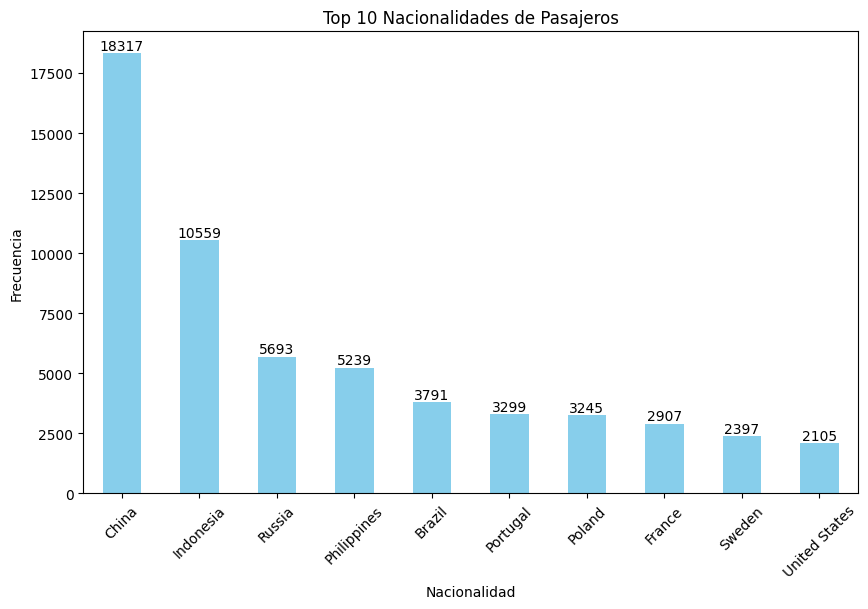

In [4]:
# Gráfico de barras apiladas para la variable 'Nationality'
nationality_counts = df['Nationality'].value_counts().head(10)
plt.figure(figsize=(10, 6))
ax = nationality_counts.plot(kind='bar', color='skyblue')

plt.title('Top 10 Nacionalidades de Pasajeros')
plt.xlabel('Nacionalidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

# Agregar etiquetas de resultados en las barras
for i, v in enumerate(nationality_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

**Variables Numéricas**

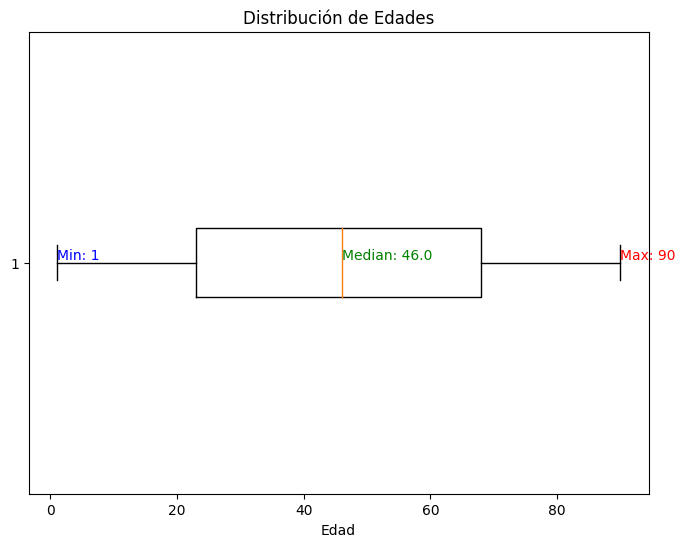

In [5]:
# Box plot para la variable 'Age'
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(df['Age'], vert=False)
plt.title('Distribución de Edades')
plt.xlabel('Edad')

# Agregar etiquetas a los valores mínimo, máximo y mediana
min_age = min(df['Age'])
max_age = max(df['Age'])
median_age = df['Age'].median()

plt.text(min_age, 1, f'Min: {min_age}', ha='left', va='bottom', fontsize=10, color='blue')
plt.text(max_age, 1, f'Max: {max_age}', ha='left', va='bottom', fontsize=10, color='red')
plt.text(median_age, 1, f'Median: {median_age}', ha='left', va='bottom', fontsize=10, color='green')

plt.show()

**Variables Temporales**

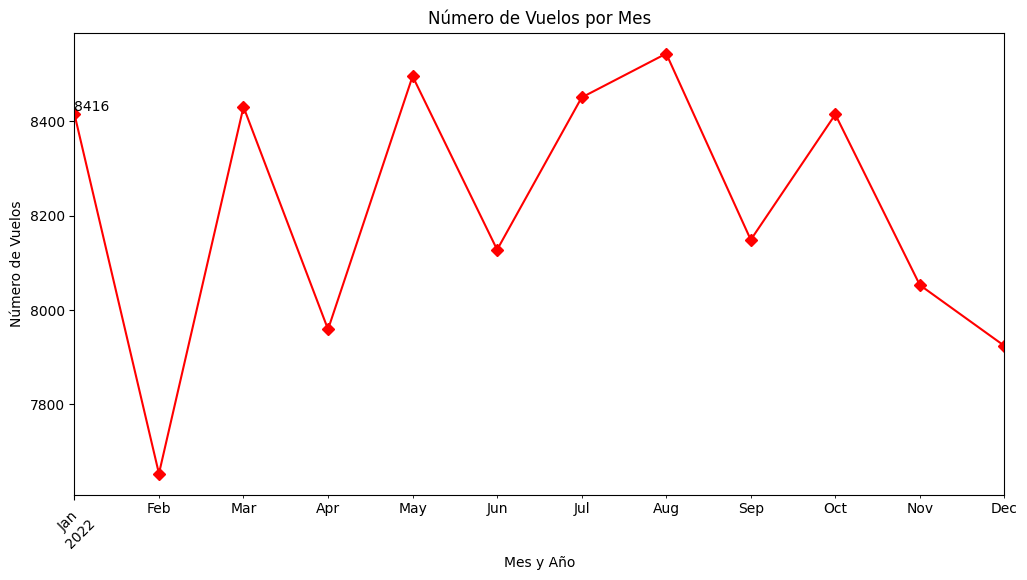

In [23]:
# Convertir la columna 'Departure Date' a tipo de dato fecha
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

# Obtener el número de vuelos por mes
df['YearMonth'] = df['Departure Date'].dt.to_period('M')  # Agrupar por mes y año
flight_counts = df.groupby('YearMonth')['Passenger ID'].count()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
line_plot = flight_counts.plot(kind='line', marker='D', color='red')
plt.title('Número de Vuelos por Mes')
plt.xlabel('Mes y Año')
plt.ylabel('Número de Vuelos')
plt.xticks(rotation=45)

# Agregar etiquetas de datos a los puntos
for x, y in zip(line_plot.get_xticks(), flight_counts):
    plt.text(x, y, str(y), ha='left', va='bottom', fontsize=10)

plt.show()


**Variables Bivariadas**

<Figure size 1000x600 with 0 Axes>

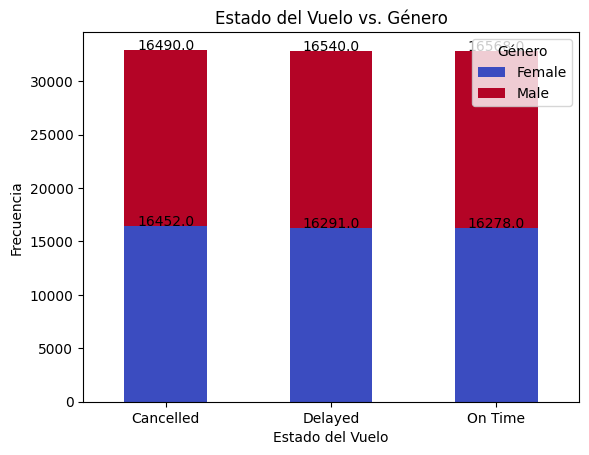

In [7]:
# Gráfico de barras apiladas para analizar el Estado del vuelo vs. Género
plt.figure(figsize=(10, 6))
ax = pd.crosstab(df['Flight Status'], df['Gender']).plot(kind='bar', stacked=True, colormap='coolwarm')

plt.title('Estado del Vuelo vs. Género')
plt.xlabel('Estado del Vuelo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Género', loc='upper right')

# Agregar etiquetas de valores en las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height), ha='center')

plt.show()


In [8]:
# Creando una tabla dinámica por país con el recuento de viajeros por Estados de vuelo

Flight_status_df = df[['Country Name','Flight Status']]
Flight_status_df['FTE'] = 1
Flight_status_pivot = pd.pivot_table(Flight_status_df, index=['Country Name'],
                                     columns=['Flight Status'],
                                     values = ['FTE'], aggfunc='count')
Flight_status_pivot = Flight_status_pivot.reset_index()
Flight_status_pivot.head(10)

Country Name       FTE                
Flight Status                      Cancelled Delayed On Time
0                      Afghanistan     137.0   121.0   114.0
1                          Albania       5.0     5.0     2.0
2                          Algeria     151.0   151.0   147.0
3                   American Samoa      21.0    10.0    14.0
4                          Andorra       4.0     1.0     2.0
5                           Angola     142.0   154.0   149.0
6                         Anguilla       7.0     4.0     3.0
7              Antigua and Barbuda       7.0     7.0     6.0
8                        Argentina     394.0   427.0   382.0
9                          Armenia       7.0     6.0     8.0

In [9]:
df['Month'] = df['Departure Date'].dt.month

In [10]:
# Variable Engineering: Extraer el día de la semana y el mes de la columna Departure Date
df['Departure Date'] = pd.to_datetime(df['Departure Date'])
df['Day_of_Week'] = df['Departure Date'].dt.dayofweek
df['Month'] = df['Departure Date'].dt.month


In [11]:
# Preparar las variables

features = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent',
            'Day_of_Week', 'Month','Pilot Name']
X = df[features].copy()

In [12]:
# Codificación de etiquetas para características categóricas
label_encoders = {}
for feature in ['Airport Name', 'Airport Country Code', 'Country Name',
                'Airport Continent', 'Pilot Name']:
    le = LabelEncoder()
    X.loc[:, feature] = le.fit_transform(X[feature])  # Use .loc to avoid SettingWithCopyWarning
    label_encoders[feature] = le

In [13]:
# handling the Target variable

y = df['Flight Status'].copy().apply(lambda x: 1 if x == 'Delayed' else 0)

In [14]:
X

,Airport Name,Airport Country Code,Country Name,Airport Continent,Day_of_Week,Month,Pilot Name
0,1717,219,221,3,1,6,29123
1,4228,34,37,3,0,12,30724
2,3034,70,72,2,1,1,23677
3,6031,34,37,3,4,9,26947
4,2870,219,221,3,4,2,9532
...,...,...,...,...,...,...,...
98614,3193,158,157,2,6,12,37096
98615,281,134,124,0,6,10,52812
98616,157,63,197,2,5,9,24076
98617,2719,40,55,0,2,10,37676


In [15]:
# Escalando las características

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
# Manejo de la variable objetivo

y = df['Flight Status'].copy().apply(lambda x: 1 if x == 'Delayed' else 0)


In [17]:
# Dividir los datos en características y objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [18]:
#Clasificadores

classifiers = {
    'XGBClassifier' : XGBClassifier(),
    'DecisionTreeCLassifier' : DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier()
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'{name}:\nAccuracy = {accuracy:.2f}\n')
    print(report)
    print('=' * 80)

XGBClassifier:
Accuracy = 0.65

              precision    recall  f1-score   support

           0       0.66      0.97      0.79     13069
           1       0.33      0.02      0.05      6655

    accuracy                           0.65     19724
   macro avg       0.50      0.50      0.42     19724
weighted avg       0.55      0.65      0.54     19724

DecisionTreeCLassifier:
Accuracy = 0.55

              precision    recall  f1-score   support

           0       0.66      0.64      0.65     13069
           1       0.34      0.35      0.34      6655

    accuracy                           0.55     19724
   macro avg       0.50      0.50      0.50     19724
weighted avg       0.55      0.55      0.55     19724

RandomForestClassifier:
Accuracy = 0.62

              precision    recall  f1-score   support

           0       0.66      0.89      0.76     13069
           1       0.33      0.11      0.16      6655

    accuracy                           0.62     19724
   macro avg  

Vamos a analizar los resultados de cada modelo individualmente:

**XGBoostClassifier** : Este modelo tiene una exactitud de 0.65, lo que significa que acierta el 65% de las predicciones. Sin embargo, al observar las métricas para la clase 1, se nota que el modelo tiene un bajo recall (solo identifica correctamente el 2% de las instancias de la clase 1) y una baja precisión (solo el 33% de las predicciones positivas son correctas), lo que sugiere un problema de desequilibrio de clases o que el modelo no está funcionando bien para predecir la clase 1.

**DecisionTreeClassifier**: Este modelo tiene una exactitud de 0.55 y muestra un rendimiento equilibrado en términos de precisión y recall para ambas clases. Sin embargo, las métricas globales son relativamente bajas, lo que sugiere que este modelo puede no ser muy efectivo en general.

**RandomForestClassifier** : Este modelo tiene una exactitud de 0.63 y muestra un buen recall para la clase 0, pero un bajo recall para la clase 1. Esto podría indicar que el modelo es mejor para predecir la clase 0 y tiene dificultades para identificar la clase 1.

**GradientBoostingClassifier**: Este modelo tiene una exactitud de 0.66 y muestra un alto recall para la clase 0, pero un recall extremadamente bajo (casi cero) para la clase 1. Esto sugiere que el modelo tiene un desequilibrio de clases y tiene dificultades para predecir la clase 1.

En resumen, es importante considerar el contexto y el equilibrio de clases al interpretar estos resultados. Ninguno de los modelos parece tener un rendimiento excepcional, y se deben explorar estrategias como el ajuste de hiperparámetros, la selección de características o el tratamiento del desequilibrio de clases para mejorar el rendimiento del modelo en la predicción de la clase minoritaria (clase 1 en este caso).

In [19]:
#No clasificadores

non_classifiers = {
    'logistic_regression': LogisticRegression(),
    'svc': SVC()
}

for name, non_classifier in non_classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'{name}:\nAccuracy = {accuracy:.2f}\n')
    print(report)
    print('=' * 80)

logistic_regression:
Accuracy = 0.66

              precision    recall  f1-score   support

           0       0.66      1.00      0.80     13069
           1       0.25      0.00      0.00      6655

    accuracy                           0.66     19724
   macro avg       0.46      0.50      0.40     19724
weighted avg       0.52      0.66      0.53     19724

svc:
Accuracy = 0.66

              precision    recall  f1-score   support

           0       0.66      1.00      0.80     13069
           1       0.25      0.00      0.00      6655

    accuracy                           0.66     19724
   macro avg       0.46      0.50      0.40     19724
weighted avg       0.52      0.66      0.53     19724



Análisis de los resultados de ambos modelos:

**Modelo logistic_regression**: El modelo logistic_regression tiene una exactitud del 66%, lo que significa que acierta el 66% de las predicciones en el conjunto de datos.
Para la clase 0, el modelo muestra una alta precisión (0.66) y un alto recall (1.00), lo que indica que es efectivo para predecir la clase 0, pero tiene un bajo rendimiento en la predicción de la clase 1.
Para la clase 1, el modelo tiene una baja precisión (0.25) y un recall extremadamente bajo (0.00), lo que sugiere que el modelo no es efectivo para predecir la clase 1.
El F1-score, que es una medida que combina precisión y recall, es alto para la clase 0 (0.80) pero muy bajo para la clase 1 (0.00).

**Modelo svc**: El modelo svc también tiene una exactitud del 66%, igual que el modelo anterior.
Al igual que el modelo logistic_regression, el modelo svc muestra un alto rendimiento para predecir la clase 0, con alta precisión y recall, pero tiene un rendimiento muy bajo para predecir la clase 1, con una baja precisión y recall, y un F1-score muy bajo.

En resumen, ambos modelos (logistic_regression y svc) tienen un buen rendimiento en la predicción de la clase mayoritaria (clase 0), pero tienen un rendimiento muy deficiente en la predicción de la clase minoritaria (clase 1). Es importante investigar estrategias para abordar el desequilibrio de clases y mejorar el rendimiento de la predicción de la clase 1, como la recolección de más datos de la clase minoritaria o el ajuste de hiperparámetros del modelo

Pruebas t y ANOVA

In [20]:
# Prueba t de dos muestras para comparar edades por género
t_test_result = pg.ttest(df[df['Gender'] == 'Male']['Age'], df[df['Gender'] == 'Female']['Age'])
print(t_test_result)

               T           dof alternative     p-val          CI95%   cohen-d  \
T-test -0.185543  98608.231733   two-sided  0.852804  [-0.35, 0.29]  0.001182   

         BF10     power  
T-test  0.007  0.053953  


Análisis de los diferentes componentes de este resultado:

1. **T (Estadístico T)**: El valor de T es -0.185543. El estadístico T es una medida de cuánto se desvía la media muestral de la media poblacional asumiendo que la hipótesis nula es verdadera. En este caso, un valor negativo sugiere que la media muestral es ligeramente menor que la media poblacional, pero el valor en sí mismo no es estadísticamente significativo sin considerar otros factores.

2. **dof (Grados de libertad)**: El valor de los grados de libertad es 98608.231733. Los grados de libertad en una prueba t indican cuánta variabilidad hay en los datos y se utilizan para calcular el valor p.

3. **alternative (Hipótesis Alternativa)**: En este caso, se especifica "two-sided", lo que significa que la prueba t es de dos colas y se está evaluando si hay una diferencia significativa en ambas direcciones, es decir, si la media es significativamente diferente de la media poblacional tanto en el lado negativo como en el lado positivo.

4. **p-val (Valor p)**: El valor p es 0.852804. El valor p es la probabilidad de obtener un valor de estadístico T al menos tan extremo como el observado en los datos si la hipótesis nula (generalmente, que no hay diferencia significativa) es verdadera. Un valor p alto (como en este caso) sugiere que no hay evidencia suficiente para rechazar la hipótesis nula.

5. **CI95% (Intervalo de Confianza del 95%)**: El intervalo de confianza del 95% es [-0.35, 0.29]. Esto indica que, con un 95% de confianza, la verdadera diferencia entre la media muestral y la media poblacional se espera que esté dentro de este intervalo. Dado que incluye el valor cero, esto es consistente con el valor p alto, lo que sugiere que no hay una diferencia significativa.

6. **cohen-d (Cohen's d)**: El valor de Cohen's d es 0.001182. Cohen's d es una medida de efecto que indica la magnitud de la diferencia entre las dos muestras en términos de desviaciones estándar. Un valor muy pequeño de Cohen's d sugiere que la diferencia entre las muestras es muy pequeña o insignificante.

7. **BF10 (Factor Bayesiano)**: El valor de BF10 es 0.007. El Factor Bayesiano se utiliza para evaluar la evidencia en favor de la hipótesis alternativa en comparación con la hipótesis nula. Un valor bajo de BF10 (como en este caso) sugiere que la evidencia a favor de la hipótesis alternativa es débil.

8. **power (Potencia estadística)**: La potencia estadística es 0.053953. Indica la probabilidad de detectar una diferencia significativa si realmente existe una. En este caso, la potencia es bastante baja, lo que sugiere que la prueba no tiene suficiente poder para detectar una diferencia significativa.

En resumen, según este resultado, no hay evidencia significativa para rechazar la hipótesis nula, ya que el valor p es alto y el intervalo de confianza contiene el valor cero. Además, tanto el Factor Bayesiano como la potencia estadística sugieren que la evidencia a favor de la hipótesis alternativa es débil.

In [21]:
# Prueba ANOVA para comparar edades entre diferentes aerolíneas
anova_result = pg.anova(data=df, dv='Age', between='Airport Name')
print(anova_result)


         Source  ddof1  ddof2         F    p-unc      np2
0  Airport Name   9061  89557  1.012963  0.20276  0.09296


Análisis de los diferentes componentes de este resultado de la Prueba ANOVA:

1. **Source (Fuente)**: La fuente se denomina "Airport Name". Esto indica que la variable categórica "Airport Name" se ha utilizado como factor o variable independiente en el ANOVA para evaluar si hay diferencias significativas entre los grupos definidos por esta variable.

2. **ddof1 (Grados de libertad entre grupos)**: El valor de ddof1 es 9061. Los grados de libertad entre grupos representan la variabilidad entre los diferentes grupos definidos por la variable "Airport Name". Cuantos más grados de libertad entre grupos haya, más grupos diferentes se están comparando en el ANOVA.

3. **ddof2 (Grados de libertad dentro de los grupos)**: El valor de ddof2 es 89557. Los grados de libertad dentro de los grupos representan la variabilidad dentro de cada uno de los grupos definidos por la variable "Airport Name". Cuantos más grados de libertad dentro de los grupos haya, más observaciones individuales se están considerando en el análisis.

4. **F (Estadístico F)**: El valor de F es 1.012963. El estadístico F es una medida de la variabilidad entre grupos en relación con la variabilidad dentro de los grupos. En este caso, un valor F cercano a 1 sugiere que la variabilidad entre grupos y dentro de los grupos es bastante similar.

5. **p-unc (Valor p)**: El valor p es 0.20276. El valor p es la probabilidad de obtener un valor de estadístico F al menos tan extremo como el observado en los datos si la hipótesis nula (generalmente, que no hay diferencias significativas entre los grupos) es verdadera. En este caso, el valor p es mayor que el nivel de significancia comúnmente utilizado de 0.05, lo que sugiere que no hay evidencia suficiente para rechazar la hipótesis nula.

6. **np2 (Eta cuadrado parcial)**: El valor de eta cuadrado parcial es 0.09296. Eta cuadrado parcial es una medida de la varianza explicada por el efecto de la variable independiente (en este caso, "Airport Name"). Un valor de 0.09296 indica que aproximadamente el 9.3% de la variabilidad en la variable dependiente se debe a las diferencias entre los grupos definidos por "Airport Name".

En resumen, según este resultado, no hay evidencia significativa para rechazar la hipótesis nula de que no hay diferencias significativas entre los grupos definidos por "Airport Name", ya que el valor p es mayor que el nivel de significancia comúnmente utilizado. El valor de eta cuadrado parcial sugiere que el efecto de "Airport Name" explica aproximadamente el 9.3% de la variabilidad en la variable dependiente.

Pruebas de correlación

In [22]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia entre 'Gender' y 'Flight Status'
contingency_table = pd.crosstab(df['Gender'], df['Flight Status'])

# Realizar la prueba de chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f'Estadístico de Chi-cuadrado: {chi2}')
print(f'Valor p: {p}')


Estadístico de Chi-cuadrado: 1.1168845915660102
Valor p: 0.5720995319792831


Análisis de los diferentes componentes de este resultado:

1. **Estadístico de Chi-cuadrado**: El valor del estadístico de chi-cuadrado es 1.1168845915660102. Este estadístico se utiliza para evaluar si existe una asociación significativa entre dos variables categóricas. Un valor mayor indica una mayor discrepancia entre las observaciones y las expectativas bajo la hipótesis nula.

2. **Valor p**: El valor p es 0.5720995319792831. El valor p es la probabilidad de obtener un estadístico de chi-cuadrado igual o más extremo que el observado en los datos si la hipótesis nula (generalmente, que no hay asociación significativa entre las variables) es verdadera.

En resumen:

- El estadístico de chi-cuadrado es relativamente bajo, lo que sugiere que no hay una discrepancia significativa entre las observaciones y las expectativas bajo la hipótesis nula.

- El valor p es alto (0.5720995319792831), lo que indica que no hay evidencia suficiente para rechazar la hipótesis nula. En otras palabras, no se encuentra una asociación significativa entre las variables categóricas evaluadas en el análisis.

En conclusión, según este resultado, no se encontró una asociación significativa entre las variables categóricas en el análisis de chi-cuadrado, ya que el valor p es mayor que el nivel de significancia comúnmente utilizado (por ejemplo, 0.05).